<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-multiclass-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(multiclass-classification)=
# Example: Multiclass Classification Problem

This example is taken from Section 4.2 of the book "Deep Learning with Python" by François Chollet.

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. 

## Step 1: Load the data

In [1]:
from tensorflow.keras.datasets import reuters 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

`train_data` and `test_data`: lists of news stories, each story being a list of word indices (encoding a sequence of words).

`train_labels` and `test_labels`: The label associated with an example is an integer between 0 and 45—a topic index.

In [2]:
story_idx = 0
print(train_data[story_idx])
print(train_labels[story_idx])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


The `imbdb` object has a method `get_word_index` that returns a dictionary mapping words to an integer index.

In [3]:
news_idx = 0

word_index = reuters.get_word_index() 

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[news_idx]])

print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
# the words indices range from 1 to 9999
print(min(min(seq) for seq in train_data))
print(max(max(seq) for seq in train_data))

print(reverse_word_index[1])
print(word_index["the"])


1
9999
the
1


## Step 2: Preprocess the data

In this step, we will convert the lists of integers into tensors that our neural network can process. 

We will implement **multi-hot-encoding** - a binary representation commonly used in NLP - to transform our lists into vectors of 0s and 1s. Each resulting tensor will be a 10,000-element vector where:

* 1 indicates the word appears in the review
* 0 indicates the word is absent

This representation creates a standardized format that our model can efficiently process while preserving the essential information about word presence in each review.



In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:  
            results[i, j] = 1.
    return results 

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)



In [6]:

# check that the vectorized data is correct
for i in train_data[0]: 
    if x_train[0, i] != 1.0: 
        print(f"i={i} x_train[0, {i}]={x_train[0, i]}")

# test your understanding: why are these values not the same? 
print(sum(x_train[0]))
print(len(train_data[0]))


57.0
87


In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels): 
        results[i, label] = 1.
        
    return results 
    
y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

In [8]:
print(y_train[0])

print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# Note that there is a built-in way to do this in Keras:

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(train_labels) 
y_test = to_categorical(test_labels)

In [10]:
print(y_train[0])

print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Step 3: Build the model

### Softmax

Given a vector of raw predictions (logits) $z = (z_1, z_2, \dots, z_n)$, the softmax function $\sigma(z)$ is defined as:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

where:

* $\sigma(z)_i$ is the predicted probability for the $i^{\text{th}}$ class.
* The probabilities satisfy $\sum_{i=1}^{n} \sigma(z)_i = 1$.


In [11]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z - np.max(z))  # subtracting np.max(z) for numerical stability
    return exp_z / np.sum(exp_z)

# Example usage:
logits = np.array([1.0, 1.0, 1.1])
probabilities = softmax(logits)
print(probabilities)   
print(np.sum(probabilities))  # the sum of the probabilities should be 1

[0.32204346 0.32204346 0.35591307]
1.0


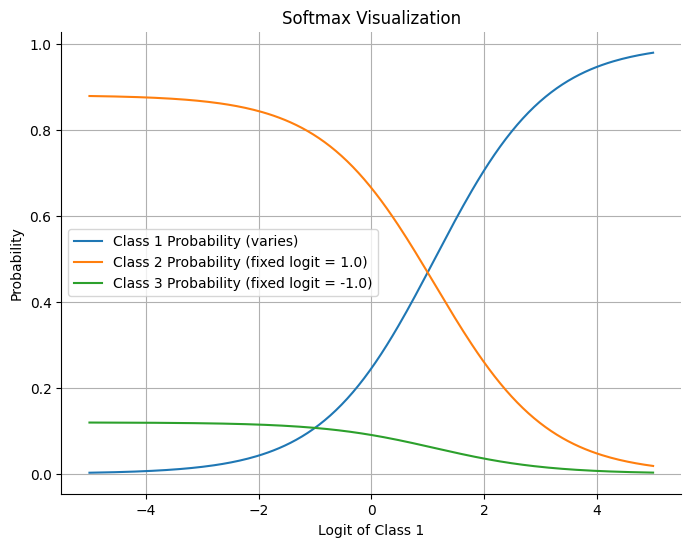

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Varying the logit of class 1, fix logits for class 2 and class 3 at distinct values
logits_class1 = np.linspace(-5, 5, 200)
fixed_logit_class2 = 1.0  
fixed_logit_class3 = -1.0 

probabilities = np.array([
    softmax([z, fixed_logit_class2, fixed_logit_class3]) 
    for z in logits_class1
])

plt.figure(figsize=(8, 6))
plt.plot(logits_class1, probabilities[:, 0], label='Class 1 Probability (varies)')
plt.plot(logits_class1, probabilities[:, 1], label=f'Class 2 Probability (fixed logit = {fixed_logit_class2})')
plt.plot(logits_class1, probabilities[:, 2], label=f'Class 3 Probability (fixed logit = {fixed_logit_class3})')

plt.xlabel("Logit of Class 1")
plt.ylabel("Probability")
plt.title("Softmax Visualization")
plt.grid(True)
sns.despine()
plt.legend()
plt.show()


### Categorical Crossentropy

Categorical cross-entropy is a loss function commonly used to train neural networks for multi-class classification problems, where each instance belongs to exactly one category.

Intuition: It measures how far away your model's predicted probabilities are from the true labels. A smaller loss means your model's predictions are close to the true labels, while a larger loss means predictions are far away.

Given:

* True labels: $y = (y_1, y_2, \dots, y_n)$, represented as a one-hot vector, where exactly one element is $1$ (the true class), and all others are $0$.
* Predicted probabilities: $\hat{y} = (\hat{y}_1, \hat{y}_2, \dots, \hat{y}_n)$, output by the softmax function.
 
The categorical cross-entropy loss is:

$$
\text{Loss} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i)
$$

Since only the true class label $y_i = 1$ contributes, this simplifies to:

$$
\text{Loss} = -\log(\hat{y}_{\text{true class}})
$$


In [13]:
import numpy as np

def categorical_crossentropy(y_true, y_pred):
    # Ensure numerical stability by adding a tiny epsilon
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

# Example usage:
y_true = np.array([0, 1, 0])   
y_pred = np.array([0.1, 0.7, 0.2])  
loss = categorical_crossentropy(y_true, y_pred)
print(loss)   


0.35667494393873245


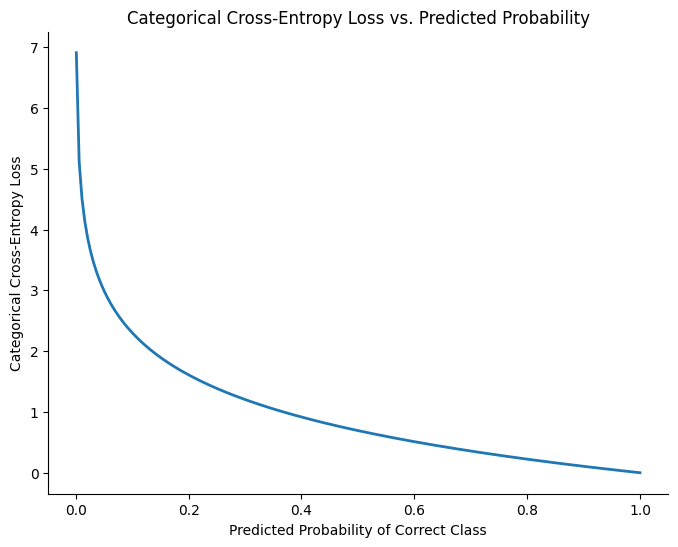

In [14]:

prob_correct = np.linspace(0.001, 1.0, 200)

loss_values = []
for p in prob_correct:
    y_true = np.array([1, 0, 0])            # True class is class 1
    y_pred = np.array([p, (1 - p)/2, (1 - p)/2])  # Remaining probability split evenly
    loss = categorical_crossentropy(y_true, y_pred)
    loss_values.append(loss)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(prob_correct, loss_values, label='Cross-Entropy Loss', linewidth=2)

plt.xlabel('Predicted Probability of Correct Class')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.title('Categorical Cross-Entropy Loss vs. Predicted Probability')
plt.grid(False)
sns.despine()
plt.show()


### Defining the Model

In [15]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Step 4: Train the model


In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

We will train the model for 20 epochs in mini-batches of 512 samples.

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.0039 - loss: 3.8467

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3060 - loss: 3.5634  

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3839 - loss: 3.2833 - val_accuracy: 0.6060 - val_loss: 1.8670


Epoch 2/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5703 - loss: 1.9104

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6408 - loss: 1.7172 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6531 - loss: 1.6599 - val_accuracy: 0.6890 - val_loss: 1.3851


Epoch 3/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6953 - loss: 1.3322

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7287 - loss: 1.2418 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7342 - loss: 1.2210 - val_accuracy: 0.7460 - val_loss: 1.1929


Epoch 4/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7910 - loss: 0.9823

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7783 - loss: 1.0268 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7838 - loss: 1.0059 - val_accuracy: 0.7610 - val_loss: 1.0819


Epoch 5/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8164 - loss: 0.8359

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8160 - loss: 0.8418 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8189 - loss: 0.8307 - val_accuracy: 0.7840 - val_loss: 1.0147


Epoch 6/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8633 - loss: 0.6743

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8597 - loss: 0.6711 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8585 - loss: 0.6718 - val_accuracy: 0.8000 - val_loss: 0.9573


Epoch 7/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8848 - loss: 0.5888

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8829 - loss: 0.5761 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8815 - loss: 0.5743 - val_accuracy: 0.8200 - val_loss: 0.9115


Epoch 8/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9102 - loss: 0.4397

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9011 - loss: 0.4690 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8994 - loss: 0.4726 - val_accuracy: 0.8090 - val_loss: 0.9206


Epoch 9/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9258 - loss: 0.3796

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9191 - loss: 0.3936 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9172 - loss: 0.3980 - val_accuracy: 0.8230 - val_loss: 0.8683


Epoch 10/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9199 - loss: 0.3418

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9231 - loss: 0.3584 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9239 - loss: 0.3551 - val_accuracy: 0.8150 - val_loss: 0.8833


Epoch 11/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9336 - loss: 0.3026

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.3172 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9312 - loss: 0.3100 - val_accuracy: 0.8340 - val_loss: 0.8583


Epoch 12/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9668 - loss: 0.2508

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9517 - loss: 0.2505 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9476 - loss: 0.2554 - val_accuracy: 0.8090 - val_loss: 0.9108


Epoch 13/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9512 - loss: 0.2414

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9469 - loss: 0.2309 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9452 - loss: 0.2333 - val_accuracy: 0.8160 - val_loss: 0.8774


Epoch 14/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9570 - loss: 0.1828

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9542 - loss: 0.2030 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9520 - loss: 0.2061 - val_accuracy: 0.8210 - val_loss: 0.8746


Epoch 15/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9609 - loss: 0.1839

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9568 - loss: 0.1821 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9551 - loss: 0.1852 - val_accuracy: 0.8270 - val_loss: 0.8733


Epoch 16/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9609 - loss: 0.1532

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9587 - loss: 0.1531 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9559 - loss: 0.1616 - val_accuracy: 0.8050 - val_loss: 0.9304


Epoch 17/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9648 - loss: 0.1617

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9628 - loss: 0.1449 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9598 - loss: 0.1504 - val_accuracy: 0.8000 - val_loss: 0.9576


Epoch 18/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9668 - loss: 0.1458

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.1482 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9580 - loss: 0.1503 - val_accuracy: 0.8080 - val_loss: 0.9377


Epoch 19/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9668 - loss: 0.1249

10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9641 - loss: 0.1311 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9622 - loss: 0.1362 - val_accuracy: 0.8190 - val_loss: 0.9243


Epoch 20/20


 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1045

 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9656 - loss: 0.1167 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9619 - loss: 0.1276 - val_accuracy: 0.8130 - val_loss: 0.9410


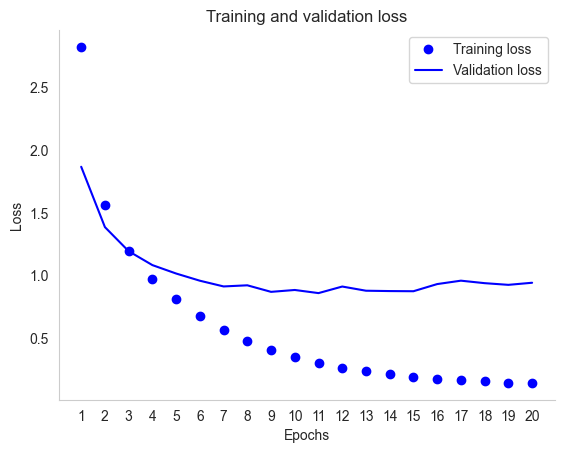

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

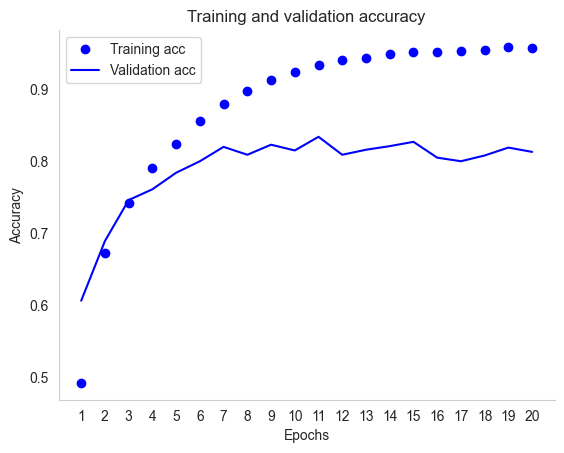

In [19]:
acc = history_dict["accuracy"]

val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc") 
plt.title("Training and validation accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [20]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   


Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.0410 - loss: 3.8433

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3447 - loss: 3.5165  

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4292 - loss: 3.2063


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6602 - loss: 1.7134

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6722 - loss: 1.6203 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6782 - loss: 1.5665


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7422 - loss: 1.2234

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7396 - loss: 1.1957 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7438 - loss: 1.1761


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 1.0463

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - loss: 0.9855 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7900 - loss: 0.9595


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8223 - loss: 0.8007

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8318 - loss: 0.7801 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8362 - loss: 0.7698


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8691 - loss: 0.6575

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8673 - loss: 0.6528 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8690 - loss: 0.6423

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8692 - loss: 0.6413


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9258 - loss: 0.4182

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9031 - loss: 0.4775 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8989 - loss: 0.4932


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9160 - loss: 0.4473

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9138 - loss: 0.4276 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9134 - loss: 0.4291


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9336 - loss: 0.3337

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9338 - loss: 0.3317 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9302 - loss: 0.3458

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9298 - loss: 0.3467


 1/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8438 - loss: 0.5616

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8075 - loss: 0.8868


The test loss is 0.9195679426193237
The test accuracy is 0.7938557267189026
The predictions are:


### Prediction  

In [21]:
predictions = model.predict(x_test)

story_idx = 0
# Each entry in “predictions” is a vector of length 46:
print(predictions[story_idx].shape)

# The coefficients in this vector sum to 1, as they form a probability distribution:
print(np.sum(predictions[story_idx]))

# The largest entry is the predicted class—the class with the highest probability:
print(np.argmax(predictions[story_idx]))

 1/71 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


(46,)
0.9999998
3


Some things to try: 

* Check the accuracy of a purely random classifier
* Try using different optimizers: `adam` or `sgd`
* Try using larger or smaller layers: 32 units, 128 units, and so on.
* True using a single intermediate layer, or three intermediate layers.



In [22]:
model = keras.Sequential([
    Dense(64, activation="relu"), 
    Dense(64, activation="relu"),
    Dense(46, activation="softmax")

])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=9, batch_size=512) 
results = model.evaluate(x_test, y_test)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
print(model.predict(x_test))

Epoch 1/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - accuracy: 0.0078 - loss: 3.8278

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2819 - loss: 3.4495  

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3661 - loss: 3.1382


Epoch 2/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6777 - loss: 1.7818

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6892 - loss: 1.6114 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6916 - loss: 1.5610


Epoch 3/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7480 - loss: 1.2345

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7486 - loss: 1.2098 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7526 - loss: 1.1878

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7531 - loss: 1.1850


Epoch 4/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7891 - loss: 0.9900

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7929 - loss: 0.9810 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7974 - loss: 0.9568


Epoch 5/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8301 - loss: 0.7374

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8264 - loss: 0.7771 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8297 - loss: 0.7732

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8303 - loss: 0.7716


Epoch 6/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8730 - loss: 0.6289

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.6424 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8625 - loss: 0.6385

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8625 - loss: 0.6375


Epoch 7/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9102 - loss: 0.4688

10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8959 - loss: 0.5169 

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8937 - loss: 0.5185

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8935 - loss: 0.5185


Epoch 8/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9062 - loss: 0.4562

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9110 - loss: 0.4215 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9095 - loss: 0.4252

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9090 - loss: 0.4269


Epoch 9/9


 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9277 - loss: 0.3952

 9/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9266 - loss: 0.3857 

17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9264 - loss: 0.3791

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9262 - loss: 0.3783


 1/71 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8438 - loss: 0.6226

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.7915 - loss: 0.8985


The test loss is 0.9207586646080017
The test accuracy is 0.7849510312080383
The predictions are:


 1/71 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step


[[1.6455502e-04 6.7847950e-04 1.2889983e-04 ... 1.5615224e-05
  1.3857707e-05 6.8172340e-06]
 [5.0135124e-03 4.3782879e-02 1.5200184e-03 ... 4.1739561e-04
  3.5994053e-05 1.0500723e-03]
 [3.9798790e-03 8.7928879e-01 2.1199943e-04 ... 5.7423531e-05
  2.6394730e-04 4.6660873e-04]
 ...
 [1.2921105e-04 3.9767459e-04 1.4362350e-04 ... 1.9371853e-05
  1.2491930e-04 9.6749354e-06]
 [5.2632098e-03 3.4903120e-02 1.7430694e-03 ... 2.1871569e-04
  3.3814248e-04 9.6775423e-04]
 [6.7695254e-03 4.6478572e-01 3.7822283e-03 ... 6.8631972e-04
  1.8990638e-03 1.1110510e-03]]
